Importing Libraries

In [52]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


Loading the dataset

In [53]:
df = pd.read_csv("C:\\Users\\PRATEEK MITTAL\\Downloads\\archive (2)\\PhiUSIIL_Phishing_URL_Dataset.csv")
print(df.head())

                                  URL  URLLength                      Domain  \
0    https://www.southbankmosaics.com         31    www.southbankmosaics.com   
1            https://www.uni-mainz.de         23            www.uni-mainz.de   
2      https://www.voicefmradio.co.uk         29      www.voicefmradio.co.uk   
3         https://www.sfnmjournal.com         26         www.sfnmjournal.com   
4  https://www.rewildingargentina.org         33  www.rewildingargentina.org   

   DomainLength  IsDomainIP  TLD  URLSimilarityIndex  CharContinuationRate  \
0            24           0  com               100.0              1.000000   
1            16           0   de               100.0              0.666667   
2            22           0   uk               100.0              0.866667   
3            19           0  com               100.0              1.000000   
4            26           0  org               100.0              1.000000   

   TLDLegitimateProb  URLCharProb  ...  Pay  Crypt

We are extraxting only the url and label column so we can extract features from the url so at the end of project, the user can verify the url just by putting it without inputiing other features. 

In [55]:
df = df[['URL', 'label']].dropna()

print("Dataset:", df.shape)
print(df['label'].value_counts())

Dataset: (235795, 2)
label
1    134850
0    100945
Name: count, dtype: int64


Splitting the training and testing dataset

In [57]:
X_train, X_test, y_train, y_test = train_test_split(
    df['URL'],
    df['label'],
    test_size=0.2,
    stratify=df['label'],
    random_state=42
)

Vectorizing the string content so model can learn better

In [58]:
vectorizer = TfidfVectorizer(
    analyzer='char',
    ngram_range=(2,6),   # captures patterns better
    max_features=10000
)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

Training the model using LogisticRegression

In [60]:
model = LogisticRegression(
    max_iter=2000,
    class_weight='balanced',  
    n_jobs=-1
)

model.fit(X_train_vec, y_train)

LogisticRegression(class_weight='balanced', max_iter=2000, n_jobs=-1)

We used Logistic Regression because we found it giving better results emperically. We tried with different techniques like random forests, xgboost etc. but Logistic Regression gave better results.

Evaluating the model

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     20189
           1       0.99      1.00      1.00     26970

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159



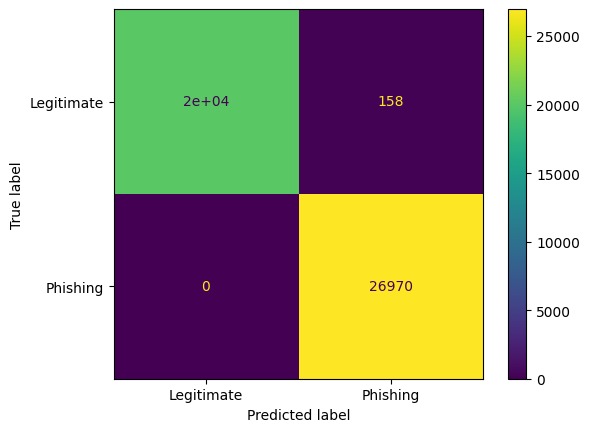

In [61]:
y_pred = model.predict(X_test_vec)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=["Legitimate","Phishing"]).plot()
plt.show()


Defining function for veryfying the urls

In [67]:
def predict_url(url):
    vec = vectorizer.transform([url])
    
    pred = model.predict(vec)[0]
    probs = model.predict_proba(vec)[0]

    phishing_conf = probs[0]
    legit_conf = probs[1]

    print("\nURL:", url)

    if pred == 0:
        print("⚠️ Phishing URL")
        print(f"Confidence: {phishing_conf*100:.2f}%")
    else:
        print("✅ Legitimate URL")
        print(f"Confidence: {legit_conf*100:.2f}%")


Testing some legitimate and phishing urls

In [74]:
test_urls = [

    
    "http://paypal-login-security-update.com",
    "http://secure-paypal-account-verification.net",
    "http://amazon-verify-account-alert.ga",
    "http://bankofamerica-login-confirmation.xyz",
    "http://microsoft-support-login-help.ml",
    "https://www.youtube.com",
    "https://www.github.com",
    "http://facebook-security-warning.cf",
    "http://appleid-confirmation-login.gq",
    "http://netflix-billing-update-required.tk",
    "http://instagram-verify-account-security.com",
    "http://whatsapp-account-recovery-alert.net",
    "http://192.168.0.1/paypal/login",
    "http://45.77.12.90/bankofamerica/signin",
    "http://paypal.com.verify-user-login.security-update.net",
    "http://amazon.in.account-security-check.com",
    "https://www.google.com",
    "http://facebook.com.login-authentication-alert.net",
    "http://verify-your-bank-account-now.com",
    "http://urgent-login-confirmation-required.net",
    "http://update-billing-information-secure.com",
    "https://www.microsoft.com",
    "https://www.amazon.in",
    "https://www.wikipedia.org",
    "https://stackoverflow.com"
    "https://www.apple.com",
    "https://www.netflix.com",
    "https://www.linkedin.com",
    "https://www.pinky.com",
    "https://127.0.0.1:8080"
    
]

for url in test_urls:
    predict_url(url)



URL: http://paypal-login-security-update.com
⚠️ Phishing URL
Confidence: 99.98%

URL: http://secure-paypal-account-verification.net
⚠️ Phishing URL
Confidence: 99.96%

URL: http://amazon-verify-account-alert.ga
⚠️ Phishing URL
Confidence: 99.99%

URL: http://bankofamerica-login-confirmation.xyz
⚠️ Phishing URL
Confidence: 99.99%

URL: http://microsoft-support-login-help.ml
⚠️ Phishing URL
Confidence: 99.99%

URL: https://www.youtube.com
✅ Legitimate URL
Confidence: 99.06%

URL: https://www.github.com
✅ Legitimate URL
Confidence: 91.77%

URL: http://facebook-security-warning.cf
⚠️ Phishing URL
Confidence: 99.95%

URL: http://appleid-confirmation-login.gq
⚠️ Phishing URL
Confidence: 100.00%

URL: http://netflix-billing-update-required.tk
⚠️ Phishing URL
Confidence: 99.99%

URL: http://instagram-verify-account-security.com
⚠️ Phishing URL
Confidence: 99.91%

URL: http://whatsapp-account-recovery-alert.net
⚠️ Phishing URL
Confidence: 99.98%

URL: http://192.168.0.1/paypal/login
⚠️ Phishin

All the phishing urls were classified as phishing urls. But 2 legitimate urls were missclassified as phishing. 
We don't have problem with this because in the product we will use combination of ML model and network validator for producing the results so the above error will also be eliminated.

Saving the model 

In [75]:
joblib.dump(model, "phishing_model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")
print("Model Saved Successfully!")

Model Saved Successfully!
